# Basit Lineer Regresyon

Regresyon tam türkçe olarak ilkelleme demektir birşeyleri basite indirgemektir.

regresyon karmaşık bilmediğimiz veri ilişkisini bildiğimiz bir formule 
yapıya indirgeme ilkelleştirme çabasıdır.

indirgemeye çalıştığı yapıya görede regresyonun başına gelen isim değişir.

işte  burada da lineer regresyon ile verilen komplex sayı setini doğru 

fonksiyonuna (ax+b) indirgemeye çalışıyor




## Not:

bizim regresyonun formulu B0+B1.X1+B2.X2+....+BnXn olur.

X'ler atribute yani değişkenlerdir. B'ler katsayı(hadi canım katsayı mı onlar)

tama katsayı olduğu belli ama bu katsayılar ilgili atribute'n sonucu % 
kaç etkilediğini göstrir. 

tamam hala gayet net katsayı buyukse sonuca etkiside büyüktür. bunu 
zaten formuşden

gayet kolay bir şekkilde çıkarabilirsin :))

## Not:

Aşşağıda birazdan bahsedicez R-squared (r kare) değeri var. hata oranı diyoruz

Verilen verinnin kendi ile o sırada tahmin edilen noktalar arasındaki farkların kareleri toplamıdır.
$$x = w_{0}+w_{1}a_{1}+w_{2}a_{2}+....+w_{k}a_{k} $$
$$w_{0}a_{0}^{1}+w_{1}a_{1}^{1}+w_{2}a_{2}^{1}+...+w_{k}a_{k}^{1}= \sum_{j=0}^{k} w_{j}a_{j}^{1}$$

$$\sum_{i=1}^{n} (x_{i} - \sum_{j=0}^{k}w_{j}a_{j}^{i})^2$$

şimdi hocam farkları aldığımız kısım var ya işte orada hatayı minimalize etmeye çalışıyoruz. 
lineer regresyon buradaki w değerlerini değiştirerek işte en küçük farkı elde etmeye çalışır

## Not: 

Linear regression'da atribute (değişken) sayısından en az bir fazla verimiz olmalı. 

## ---
özellikle tahmşnlerde çok kullanılır. mesela 20 yılın satış verileri var elimizde 
bir doğru çizilip 60.yılın satışı tahmin edilmeye çalışılır.

## Hatalar

1.Herkese güvenmek. Şak şaka :))

* Mean Absolute Error: Tahmin edilen değer ile gerçek değerler arasındaki farkların mutlak değerlerinin ortalamsı (p=predicted tahmin edilen)
$${| p_{1}-a_{1}|+...+|p_{n}-a_{n}|}\over{n} $$

* Root Mean Square Error: Farkların kareleri toplamının ortalamsının kare kökü :) $$\sqrt{{(p_{1}-a_{1})^2+...+(p_{n}-a_{n})^2}\over{n}} $$

* Relative Absolute Error: tahmin değeri ile gerçek değerler arasındaki farkların mutlak değerleri, gerçek değerlerin ortalamdan sapması toplamlarına bölünür.
$${{|p_{1}-a_{1}|+...+|p_{n}-a_{n}|}\over{|a_{1}-\overline{a}|+...+|a_{n}-\overline{a}|}} $$

* Root Relative Squared Error: yukarıdaki aynı işlemi önce kare alıp sonra kareköke alınmış hali
$$\sqrt{{(p_{1}-a_{1})^2+...+(p_{n}-a_{n})^2}\over{(a_{1}-\overline{a})^2+...+(a_{n}-\overline{a})^2}} $$


In [2]:
import pandas as pd
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4]) #indexleri değişken gibi gördü bunu düzeltmek için yaptık:)
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T
#std cok büyük ama biz dağilima bakıyoruz bu tek başına sorunn olduuğunu göztermez
#daha yayvan bir dağılılm olduğunu düşünebiliriz
#median ve maen arasında ciddi fark varsa o zaman sıkıntı vardır diyebiliriz

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.median()

TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

In [6]:
#eksisk gözelem kontrolu
df.isnull().values.any()

False

In [7]:
#korelasyona yani değişkenler arsındaki ilişkiye baklım
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


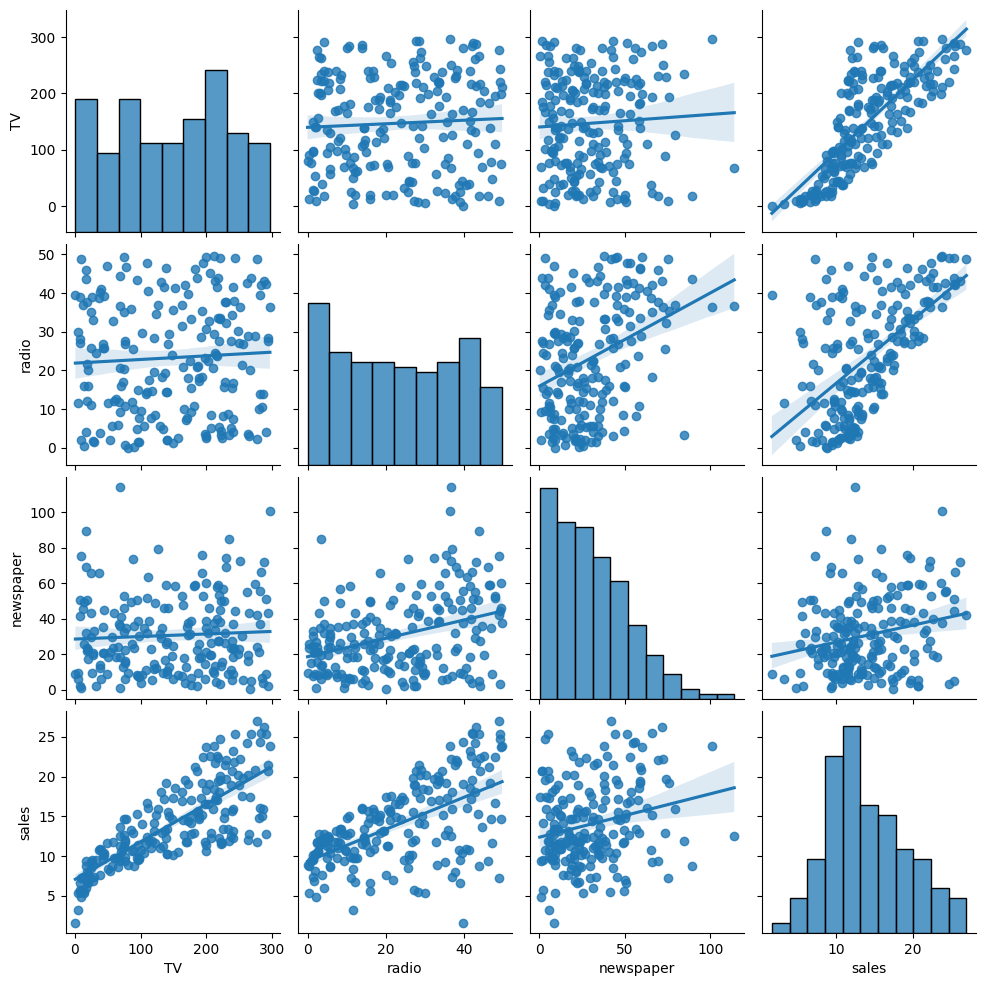

In [8]:
import seaborn as sns
# verielr arasındaki ilşkileri göstrir
sns.pairplot(df,kind="reg");
# mesala tv ve sales arasındaki ilişkiye bakalım. eğimi bir alan doğru. doğrusal pozitif yönlü kuvvetli ilişki
# eğimin bir olması tam ideal durum
# news paper salaes ilşkisine bakarsak eğim daha hafif
# eğim burada şiddeti ifasde eder eğimin 0 a yaklaşması ilşkinin zayıfladığını gösterir. 
# aşşağıya dönmeside negatif yönlü olduğunu gösterir

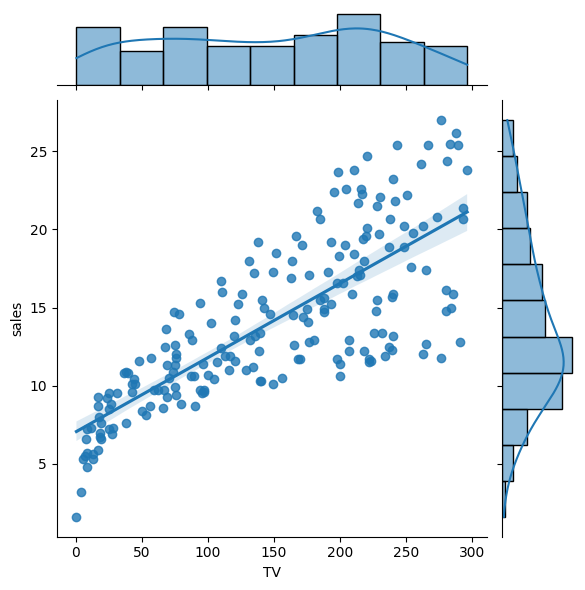

In [9]:
#tv ve sales arasındaki ilişkiye odaklanalım
#bildiğin üzere joinplot histogram ve saçılım grafiğinin birleşmiş halidir ikili iliki üzerinde duru
sns.jointplot(x="TV", y="sales", data=df, kind="reg")
#? görüldüğü üzere tv ikili dağılım yapısına sahip iki tepecikli
#? satış ise gayet düzgün bir dağılaam sahip

In [10]:
#mesala tv ile radio arasında ciddi bşr ilişki yok 
# o zaman sales için radio ve tv ye göre ayrı ayrı bakabiliriz
# yapmaya çalıştığımız şey şu. sales değişkenini inceleyeceğiz. ancak iki tane arasında koralasyon(ilişki) olan değişkene göre inceleresek zaten
# bu değişkenlerin hali hazırda arasında koralasyon olduğu için bundan etkilenip saalesı isteğimiz gibi net olarak göremeyiz
# bizde tv ve readio gibi aralarında 0.05 gibi düşük koralasyon olan değişkenlerle ayrı ayrı inceleriz.

# HADİ BAŞLAYALIM :))

### Statsmodels ile modelleme

In [11]:
import statsmodels.api as sm

In [12]:
#bağımsiz değişkenimiz seçiyoruz
x=df[["TV"]]
print(type(x))
x[0:5]


<class 'pandas.core.frame.DataFrame'>


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
#teknik bir işlme sadece x bağımsiz değişkeninden oluşan matrise sabit 1 ekliyoruz
x=sm.add_constant(x)

In [14]:
x[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
#bapımlı değişkenimizi seçiyoruz
y=df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
# lineer modemizi kuruyoruz
#aslında initialize ettik
lm=sm.OLS(y,x)


In [17]:
#modeli fit edelim
model=lm.fit()

In [18]:
#bir özetle modelimiez bakalım
model.summary()

# mesela burad R_squaredd değeri var bu bağımsiz değişkenin bağımlı değişken üzerindeki değişimin ne kadarının açıklayabildiğini belirtir
# yani sales değişkenin üzerindeki yaklaşık %60 lık değişim tv ile açıklanabiliyor
# adj.R-squared ise düzeltilmiş R değeridir. R-squared anlamlı anlamsız değişken olması durumda r square artr iste bu anlamsız
# artiıilardan kurtulmak daha doğru değere ulaşmak için düzeltilmiş r kare kullanılır. 

#F statistic modelin anlamlığını belirtir
# prı-op()F_statisticise p value değeridir

#katsayı kısmı -->en önemli kısım
# basit doğrusal regresyonun formuşünde B0+B1.Xi+ei demiştik
# işte B0 [const,coef] kısmı. B1 [TV,coef] kısmı
# hemen satırların devamına baktığımızda standard hatsı var. biraz daha ilerlediğimizde bu katsayının anlamlı olup olmadığını belirten 
# t istatistiği ve p value değerleri var.  
# biraz dahah devam ettiğimizde ise güüzen aralıklarını görürüz.
# direkt buradaki bilgilerden hareket edersek bize diyor ki. bu katsayıla anlamlısır 
# ve %95 doğruluk ile b0=[6.130 ,7.935] aralığında b1=[0.042, 0.053] aralığında yer alır.

# katsayıları yorumlayalım b0=[const,coef] eğrinin y eksenini kestiği nokta. yani diğer değişkenlerde bir değişiklik olmmadığında beklene ort satış budur
# tv nin yani b1 in yorumunu yaparsakta : eğer tv de bir birimlik artış olursa satışlarda da 0.0475 lik artış beklenir. hocam böyle
# edebi ayzıyorumda zatenn formulllerden bunları çıkartabiliyorsun. b0+b1.Xi+ei
#  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        19:44:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()
# aynı şekli elde ettik sadece fonksiyonn çağirma şeklimiz farlı
# dikkatini çekmiş ayrı ayrı x'i matrise
# y yi seriye çeirme işlemlerini aylamış oolduk

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        19:44:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#katsayıları göreyim de artık tahmini yapayım dersen

In [21]:
#modelin parametrelerine ulaşmak için temizden model.params deriz:))
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
#katsayı kısmını almak için
#şimdi yukarıdaki tabloya bakalım Dep. ->Variable:  ->Covariance Type:  ->Omnibus: tablonun üç kısmı şimdi biz katsayılaryani [1]. indise ulaşmak istiyoruz
model.summary().tables[1]

#yani özet diyip çalıştırıp tüm bilgilere ulaşmaktansa sadece tablonun 1.indisine yani katsayılar bilgisine ulaştık

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
#katsayıların güven aralıklarını öğrenmek için: adı üstünde conf_int()diyoruz
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [24]:
#modelin anlamlılığını öğrenmek için artık dilimizde tüy bitti p value değerine bakarız.
# bakalım
print("p_value %.4f"%model.f_pvalue)

#f istatistiğiin p-value sine bakıypruz

p_value 0.0000


In [25]:
#direkt f istatistiğine baakmak istersek
print("f value %.4f"%model.fvalue)

f value 312.1450


In [26]:
#parametre anlamlılığı
model.tvalues[:]

#zaten buraya kadar verdiğimiz değerleri tabloda gördük okuduk ama belirli bir değeri tek başına net olarak görmek istesek
# nasıl çağırırız bunu ogrenmek için birde tek tek çağırdık

Intercept    15.360275
TV           17.667626
dtype: float64

In [27]:
#mse nedir: ortalama kare hatası (mean squared error)
#yukarıda bahsettik gerçek değerle tahmin değerleri arasındakş farkin kareleri ortalamasının karekoku oluyor
model.mse_model

#ama 3314.618 korkunç bir sayı 

3314.6181668686495

In [28]:
model.rsquared
#aşırı uyumu göz ardı edemez. doğru sonuç vermesine rağmen model testten geçeemez
# bu yüzden düzeltilmiş r kare değeri kuşşanılır

0.6118750508500712

In [29]:
model.rsquared_adj
#0.609 daha iyi bir sayı kabul edilebilr

0.6099148238341625

In [32]:
model.fittedvalues[0:5]
#tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
y[0:5]
#gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [40]:
#hadi modelimizin denklemini yazalım
# neydi denklemimiz ax+b
print(str("%.2f"%model.params[1])+ " * TV + "+str("%.2f"%model.params[0])+"\n")
print(model.params[1],"* TV +",model.params[0])#üstteki yazım daha güzel oldu

#peki ne yapıcaz burada.
#mesala bize gelip diyecekler ben nnu yıl TV reklam harcamasına bu kadar para verdim. TV'ye şu kadar para yatırdm
#benim satışlar ne ı-olur. bizd egelip modelde değeleri yerine yazıcaz ve tahmin edicez. geleceği tahmin ediyoruz :))

0.05 * TV + 7.03

0.047536640433019764 * TV + 7.032593549127696


Text(0, 0.5, 'satis miktari')

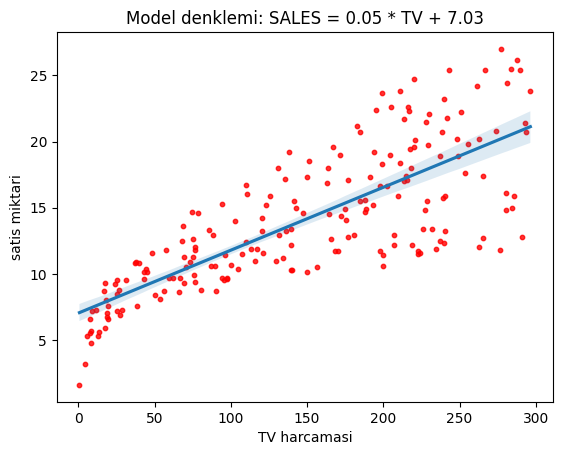

In [53]:
image=sns.regplot(x="TV",y="sales",data=df,scatter_kws={"color":"r","s":10})#s size
image.set_title("Model denklemi: SALES = 0.05 * TV + 7.03")
image.set_xlabel("TV harcamasi")
image.set_ylabel("satis miktari")

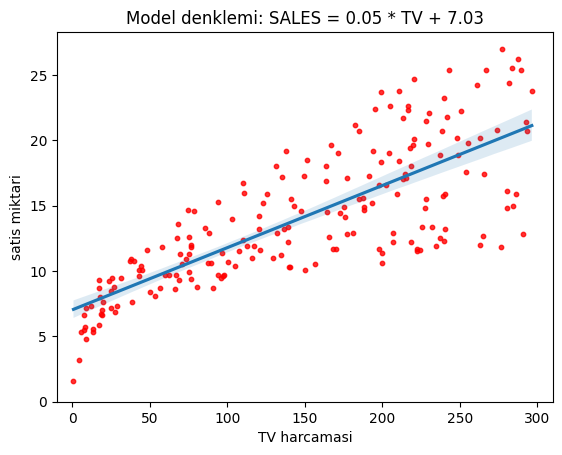

In [52]:
image=sns.regplot(x="TV",y="sales",data=df,scatter_kws={"color":"r","s":10})#s size
image.set_title("Model denklemi: SALES = 0.05 * TV + 7.03")
image.set_xlabel("TV harcamasi")
image.set_ylabel("satis miktari")

import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(0);